#CNN

##Import dan mounting data

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score

In [ ]:
!git clone https://github.com/antonwijayacakra/Datasheet-fundus-STQ-with-AI-.git
data_dir = base_dir = './Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/'

Cloning into 'Datasheet-fundus-STQ-with-AI-'...
remote: Enumerating objects: 3257, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 3257 (delta 0), reused 8 (delta 0), pack-reused 3236
Receiving objects: 100% (3257/3257), 188.55 MiB | 37.30 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (3302/3302), done.


##Menentukan dimensi gambar dan batch size

In [ ]:
# Tentukan dimensi gambar dan batch size
img_size = (224, 224)
batch_size = 20

# Gunakan ImageDataGenerator untuk augmentasi data jika diperlukan
train_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2])
test_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2])

# Muat data pelatihan
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'Train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Muat data pengujian
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'Test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Muat data validasi
validation_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'Validation'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


##Menentukan arsitektur yang digunakan

**PILIH SALAH SATU**

Menggunakan arsitektur yang sudah disediakan di library Tensorflow.Keras.Application

###Xception

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.xception import Xception
awal = Xception(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_2')>

###VGG16 & VGG19

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
awal = VGG16(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
awal = VGG19(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

###Resnet

Resnet terdapat banyak versi ada


*   ResNet50
*   ResNet50V2
*   ResNet101
*   ResNet101V2
*   ResNet152
*   ResNet152V2



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
awal = ResNet50(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

###GoogLeNet atau Inception


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.inception_v3 import InceptionV3
awal = InceptionV3(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
awal = InceptionResNetV2(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

###Mobile Net V2

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
awal = MobileNetV2(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(3, activation='sigmoid')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>

###DenseNet


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.densenet import DenseNet121
awal = DenseNet121(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.densenet import DenseNet169
awal = DenseNet169(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.densenet import DenseNet201
awal = DenseNet201(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

###NASNet

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.nasnet import NASNetMobile
awal = NASNetMobile(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.nasnet import NASNetLarge
awal = NASNetLarge(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

###EfficientNet

EfficientNet terdapat dari B0 - B7

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B3
awal = EfficientNetV2B3(weights='imagenet')
x = Flatten()(awal.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=awal.input, outputs=prediction)
model.input

##Melakukan pre-processing sebelum melakukan pengujian

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

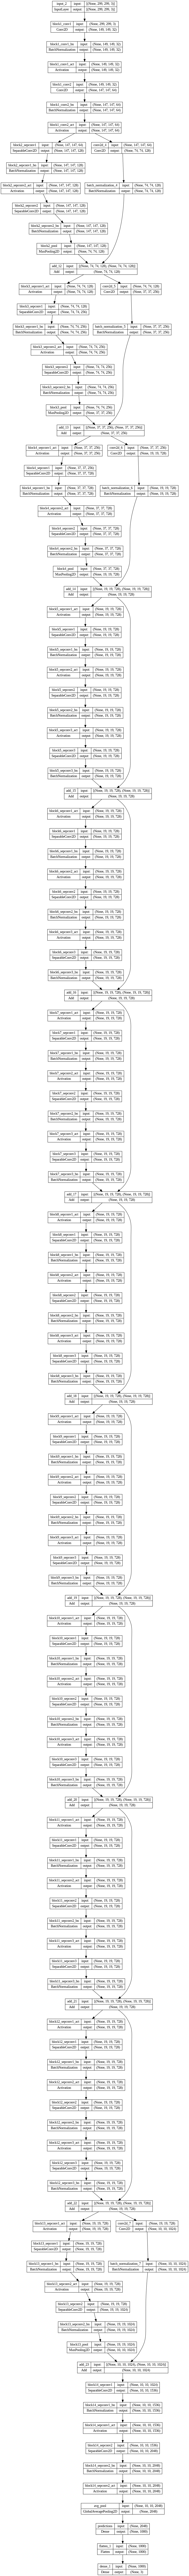

In [ ]:
# Plot model ke file gambar
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)
history = model.fit(
    train_generator,
    steps_per_epoch=135,
    epochs=30,  # Sesuaikan dengan jumlah epoch yang diinginkan
    validation_data=validation_generator,
    validation_steps=15,callbacks=[callback]
)

Epoch 1/30
135/135 [==============================] - 82s 500ms/step - loss: 0.9687 - accuracy: 0.4915 - val_loss: 1.6576 - val_accuracy: 0.3233
Epoch 2/30
135/135 [==============================] - 70s 515ms/step - loss: 0.8312 - accuracy: 0.5663 - val_loss: 1.0593 - val_accuracy: 0.4800
Epoch 3/30
135/135 [==============================] - 67s 493ms/step - loss: 0.8230 - accuracy: 0.5744 - val_loss: 1.6467 - val_accuracy: 0.1767
Epoch 4/30
135/135 [==============================] - 70s 515ms/step - loss: 0.7925 - accuracy: 0.6019 - val_loss: 1.2438 - val_accuracy: 0.4900
Epoch 5/30
135/135 [==============================] - 67s 492ms/step - loss: 0.7752 - accuracy: 0.6037 - val_loss: 0.9496 - val_accuracy: 0.5167
Epoch 6/30
135/135 [==============================] - 67s 493ms/step - loss: 0.7516 - accuracy: 0.5830 - val_loss: 1.1241 - val_accuracy: 0.4833
Epoch 7/30
135/135 [==============================] - 66s 491ms/step - loss: 0.7636 - accuracy: 0.5952 - val_loss: 1.6898 - val_ac

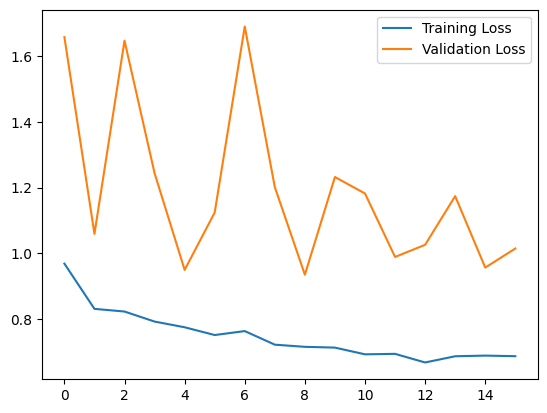

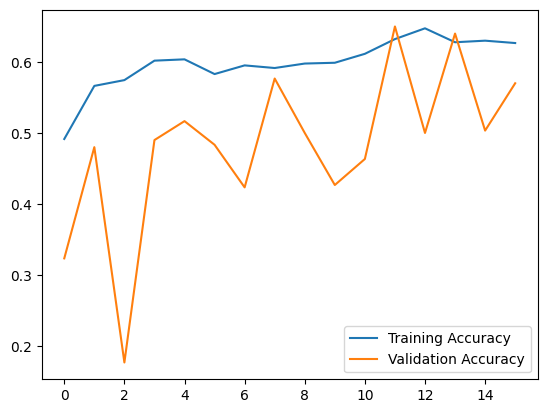

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=135)
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

# Prediksi label dan ground truth untuk menghitung F1 score
y_pred = model.predict(train_generator, steps=135)
y_true = train_generator.classes

# Menggunakan f1_score dari scikit-learn untuk menghitung F1 score
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='weighted')

print(f'F1 Score: {f1}')

135/135 [==============================] - 49s 360ms/step - loss: 0.6783 - accuracy: 0.6285
Train Loss: 0.6782585978507996, Train Accuracy: 0.6285185217857361
135/135 [==============================] - 50s 363ms/step
F1 Score: 0.3094245073011215


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=15)
print(f'Val Loss: {val_loss}, Val Accuracy: {val_accuracy}')

# Prediksi label dan ground truth untuk menghitung F1 score
y_pred = model.predict(validation_generator, steps=15)
y_true = validation_generator.classes

# Menggunakan f1_score dari scikit-learn untuk menghitung F1 score
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='weighted')

print(f'F1 Score: {f1}')

15/15 [==============================] - 8s 549ms/step - loss: 1.1389 - accuracy: 0.5900
Val Loss: 1.1388834714889526, Val Accuracy: 0.5899999737739563
15/15 [==============================] - 8s 578ms/step
F1 Score: 0.5198527837479516


In [ ]:
# Evaluasi model pada data tes
test_loss, test_accuracy = model.evaluate(test_generator, steps=15)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Prediksi label dan ground truth untuk menghitung F1 score
y_pred = model.predict(test_generator, steps=15)
y_true = test_generator.classes

# Menggunakan f1_score dari scikit-learn untuk menghitung F1 score
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='weighted')

print(f'F1 Score: {f1}')

15/15 [==============================] - 7s 473ms/step - loss: 1.1698 - accuracy: 0.5367
Test Loss: 1.1698499917984009, Test Accuracy: 0.5366666913032532
15/15 [==============================] - 8s 520ms/step
F1 Score: 0.3129338012472365
